In [54]:
import numpy as np 
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt 

import cv2 

In [55]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

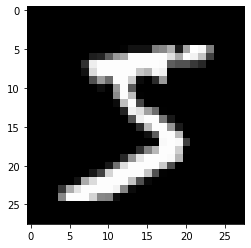

In [56]:
plt.imshow(x_train[0].reshape(28,28))
plt.gray()

In [57]:
def image_compress(x, k=2): 
    comp_size = int(28/k)
    x_temp = x.reshape(28,28)
    x_comp = np.zeros(comp_size * comp_size).reshape(comp_size, comp_size)
    for i in range(0, comp_size): 
        for j in range(0, comp_size): 
            avg = x_temp[k*i:k*(i+1), k*j:k*(j+1)] 
            x_comp[i,j] = np.mean(avg) 
    x_comp = x_comp.reshape(comp_size * comp_size)
    return x_comp

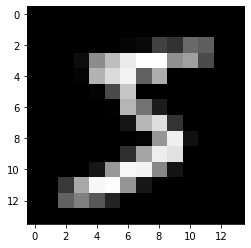

In [58]:
x1 = image_compress(x_train[0], 2)
plt.imshow(x1.reshape(14,14))
plt.gray()

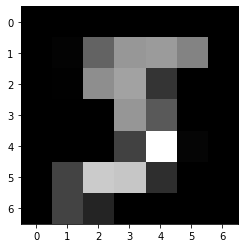

In [59]:
x1 = image_compress(x_train[0],4)
plt.imshow(x1.reshape(7,7))
plt.gray()

In [60]:
#n_train = np.shape(x_train)[0]
n_train = 100
x_train_comp = []
for i in range(n_train): 
    x_train_comp = np.append(x_train_comp, image_compress(x_train[i], 2))
x_train_comp = x_train_comp.reshape((n_train, -1))

#np.shape(x_train_comp)

In [61]:
from data_get import get_data_compress

x_train, y_train, x_valid, y_valid, x_test, y_test  = get_data_compress(k=4)

In [65]:
d = np.shape(x_train)[1]
guess1, guess2 = 1, 1.1
cov_x = np.cov(x_train.T)
print(np.linalg.det(cov_x))
px_train = (np.exp(-1 / 2 * np.sum(np.multiply(x_train.T, cov_x @ x_train.T), axis=0)) * 1 / (
                                (2 * np.pi) ** (d / 2)) / np.sqrt(np.linalg.det(cov_x))).reshape(len(x_train), 1)


0.0


<ipython-input-65-d796a9814226>:5: RuntimeWarning: divide by zero encountered in true_divide
  px_train = (np.exp(-1 / 2 * np.sum(np.multiply(x_train.T, cov_x @ x_train.T), axis=0)) * 1 / (
